# Analisis exploratorio competencia regresion

**Grupo 2:**

    Ronaldo Ballesteros salguero
    Hugo Ruiz Bautista
    Anlly Marcela Murillo Moncayo
    Oscar Camilo Alvarez Torres

In [72]:
library(dplyr)
library(car)
library(explore)
library(psych)
library(corrplot)
library(MVN)
library(moments)

In [73]:
data <- read.csv("C:\\Users\\U1037319\\Downloads\\Test real state.csv")


## Analisis Exploratorio de Datos

In [74]:
dim(data)

[1] 1767   30

In [75]:
head(data)

,X,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot.Ground.,⋯,N_FacilitiesNearBy.Mall.,N_FacilitiesNearBy.ETC.,N_FacilitiesNearBy.Park.,N_SchoolNearBy.Elementary.,N_SchoolNearBy.Middle.,N_SchoolNearBy.High.,N_SchoolNearBy.University.,N_FacilitiesInApt,N_FacilitiesNearBy.Total.,N_SchoolNearBy.Total.
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3016,2013,2013,6,910,18,terraced,individual_heating,management_in_trust,8,⋯,1,0,1,4,2,2,3,7,9,11
2,5492,2014,2017,4,640,25,terraced,individual_heating,management_in_trust,90,⋯,1,5,0,4,3,5,5,9,14,17
3,2757,1992,2013,2,640,5,corridor,individual_heating,management_in_trust,200,⋯,1,5,1,4,3,5,5,3,16,17
4,1397,2006,2010,7,914,16,terraced,individual_heating,management_in_trust,249,⋯,1,0,0,2,2,1,2,5,3,7
5,510,1993,2009,1,644,17,mixed,individual_heating,management_in_trust,523,⋯,1,5,0,4,3,5,5,4,14,17
6,4985,2007,2016,7,1334,23,terraced,individual_heating,management_in_trust,7,⋯,1,0,1,2,1,1,1,5,9,5


In [76]:
colnames(data)

[1] "X"                                  "YearBuilt"                         
 [3] "YrSold"                             "MonthSold"                         
 [5] "Size.sqf."                          "Floor"                             
 [7] "HallwayType"                        "HeatingType"                       
 [9] "AptManageType"                      "N_Parkinglot.Ground."              
[11] "N_Parkinglot.Basement."             "TimeToBusStop"                     
[13] "TimeToSubway"                       "N_APT"                             
[15] "N_manager"                          "N_elevators"                       
[17] "SubwayStation"                      "N_FacilitiesNearBy.PublicOffice."  
[19] "N_FacilitiesNearBy.Hospital."       "N_FacilitiesNearBy.Dpartmentstore."
[21] "N_FacilitiesNearBy.Mall."           "N_FacilitiesNearBy.ETC."           
[23] "N_FacilitiesNearBy.Park."           "N_SchoolNearBy.Elementary."        
[25] "N_SchoolNearBy.Middle."             "N_SchoolNearBy.High."              
[27] "N_SchoolNearBy.University."         "N_FacilitiesInApt"                 
[29] "N_FacilitiesNearBy.Total."          "N_SchoolNearBy.Total."

In [77]:
str(data)

'data.frame':	1767 obs. of  30 variables:
 $ X                                 : int  3016 5492 2757 1397 510 4985 2071 1130 4438 2126 ...
 $ YearBuilt                         : int  2013 2014 1992 2006 1993 2007 1992 2006 2014 2009 ...
 $ YrSold                            : int  2013 2017 2013 2010 2009 2016 2011 2010 2015 2011 ...
 $ MonthSold                         : int  6 4 2 7 1 7 8 3 9 10 ...
 $ Size.sqf.                         : int  910 640 640 914 644 1334 1448 818 288 910 ...
 $ Floor                             : int  18 25 5 16 17 23 13 22 12 9 ...
 $ HallwayType                       : chr  "terraced" "terraced" "corridor" "terraced" ...
 $ HeatingType                       : chr  "individual_heating" "individual_heating" "individual_heating" "individual_heating" ...
 $ AptManageType                     : chr  "management_in_trust" "management_in_trust" "management_in_trust" "management_in_trust" ...
 $ N_Parkinglot.Ground.              : int  8 90 200 249 523 7 142 249

Para cada una de las variables se identifica cantidad de valores faltantes, el porcentaje que estos representan, cantidad de valores únicos, mínimo. media y máximo. Se evidencia que no hay valores faltantes para todas las columnas del conjunto de datos.

In [78]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,1767,2932.4521788,1706.0942639,2889,2928.3385159,2183.8698,4,5891,5887,0.02663103,-1.1962748,40.586794080
YearBuilt,2,1767,2002.9501981,8.7334901,2006,2003.6374558,4.4478,1978,2015,37,-0.73933868,-0.5212387,0.207763645
YrSold,3,1767,2012.6672326,2.9109405,2013,2012.7180212,4.4478,2007,2017,10,-0.11857217,-1.1776052,0.069249247
MonthSold,4,1767,6.1544992,3.4009876,6,6.1187279,4.4478,1,12,11,0.06857510,-1.1700701,0.080907126
Size.sqf.,5,1767,954.7758913,395.2408567,910,919.1123675,394.3716,135,2337,2202,0.93451296,1.0195527,9.402504657
Floor,6,1767,11.9366157,7.3896143,11,11.3469965,7.4130,1,43,42,0.80534574,0.7691065,0.175793776
HallwayType*,7,1767,2.4855688,0.6910617,3,2.6063604,0.0000,1,3,2,-0.98233334,-0.3168275,0.016439876
HeatingType*,8,1767,1.9501981,0.2175971,2,2.0000000,0.0000,1,2,1,-4.13556375,15.1114405,0.005176483
AptManageType*,9,1767,1.0571590,0.2322119,1,1.0000000,0.0000,1,2,1,3.81195163,12.5380719,0.005524160


### Anomalías en datos numéricos

Se observan algunos valores atipicos para variables numericas, como por ejemplo para la variable Size sqf. o la variable Floor. 

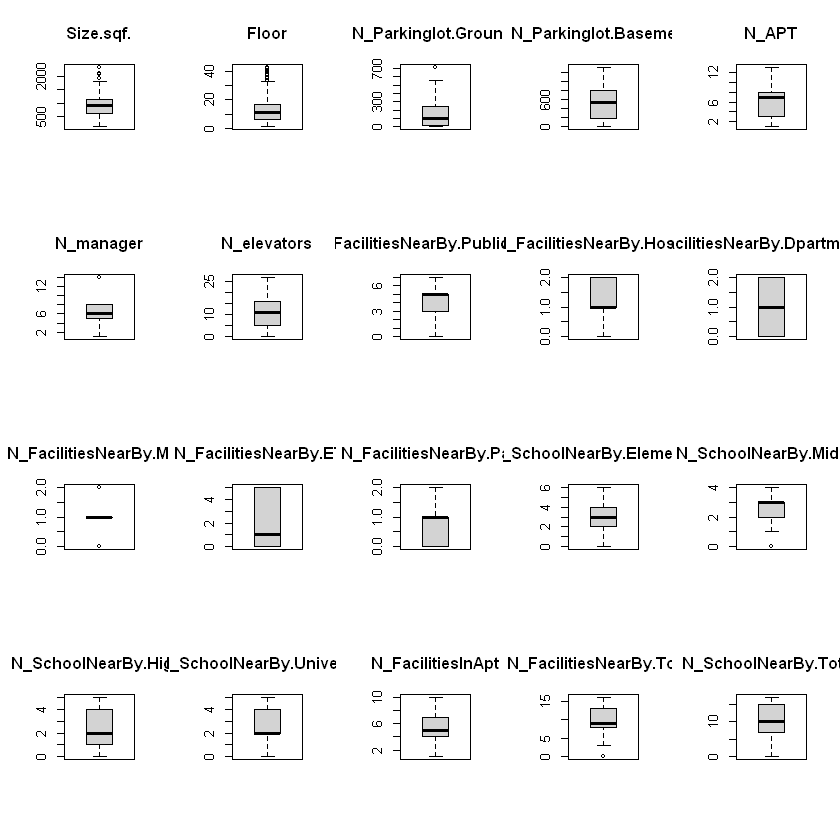

In [89]:
# Definir las variables correctamente
variables <- c("Size.sqf.", "Floor", "N_Parkinglot.Ground.", "N_Parkinglot.Basement.", 'N_APT', 'N_manager', 'N_elevators', 'N_FacilitiesNearBy.PublicOffice.','N_FacilitiesNearBy.Hospital.','N_FacilitiesNearBy.Dpartmentstore.','N_FacilitiesNearBy.Mall.' ,'N_FacilitiesNearBy.ETC.','N_FacilitiesNearBy.Park.','N_SchoolNearBy.Elementary.','N_SchoolNearBy.Middle.','N_SchoolNearBy.High.','N_SchoolNearBy.University.','N_FacilitiesInApt','N_FacilitiesNearBy.Total.','N_SchoolNearBy.Total.')

# Crear boxplots para cada variable
par(mfrow = c(4, 5))  # Ajustar el layout para 4x5 gráficos

for (var in variables) {
  boxplot(data[[var]], main = var)  # outline = FALSE para quitar outliers
}

# Restaurar la configuración de gráficos a una sola gráfica
par(mfrow = c(1, 1))



### Estadisticas Descriptivas

#### Medidas de posición: frecuencias y cuantiles

Se analiza para algunas variables categoricas su distribucion de frecuencia. Se observa que para la variable HallwayType el tipo terraced tiene 1059 repeticiones. Para la variable de HeatingType el valor que mas se repite es individual_heating.

In [80]:
tabla<-table(data$HallwayType)
tabla
prop.table(tabla)


corridor    mixed terraced 
     201      507     1059 


 corridor     mixed  terraced 
0.1137521 0.2869270 0.5993209 

In [81]:
tabla<-table(data$HeatingType)
tabla
prop.table(tabla)


   central_heating individual_heating 
                88               1679 


   central_heating individual_heating 
        0.04980192         0.95019808 

Se calcula el coeficiente de variacion para todas las variables numericas:

In [82]:
var_numericas <- c('YearBuilt','YrSold','MonthSold','Size.sqf.','Floor','N_Parkinglot.Ground.','N_Parkinglot.Basement.','N_APT','N_manager','N_elevators','N_FacilitiesNearBy.PublicOffice.','N_FacilitiesNearBy.Hospital.','N_FacilitiesNearBy.Dpartmentstore.','N_FacilitiesNearBy.Mall.','N_FacilitiesNearBy.ETC.','N_FacilitiesNearBy.Park.','N_SchoolNearBy.Elementary.','N_SchoolNearBy.Middle.','N_SchoolNearBy.High.','N_SchoolNearBy.University.','N_FacilitiesInApt','N_FacilitiesNearBy.Total.','N_SchoolNearBy.Total.')

# Función para calcular el coeficiente de variación
calcular_cv <- function(x) {
  sd_x <- sd(x)  # Desviación estándar
  mean_x <- mean(x)  # Media
  cv <- sd_x / mean_x * 100  # Coeficiente de variación
  return(cv)
}

# Calcular el coeficiente de variación para cada columna
resultados_cv <- sapply(data[var_numericas], calcular_cv)

resultados_cv


YearBuilt                             YrSold 
                         0.4360313                          0.1446310 
                         MonthSold                          Size.sqf. 
                        55.2601849                         41.3961915 
                             Floor               N_Parkinglot.Ground. 
                        61.9071137                        110.5930196 
            N_Parkinglot.Basement.                              N_APT 
                        72.2999310                         51.5178915 
                         N_manager                        N_elevators 
                        50.5550669                         69.5364145 
  N_FacilitiesNearBy.PublicOffice.       N_FacilitiesNearBy.Hospital. 
                        43.6611023                         36.6507209 
N_FacilitiesNearBy.Dpartmentstore.           N_FacilitiesNearBy.Mall. 
                        89.9992620                         43.3134792 
           N_FacilitiesNearBy.ETC.           N_FacilitiesNearBy.Park. 
                       112.8260637                         98.2829676 
        N_SchoolNearBy.Elementary.             N_SchoolNearBy.Middle. 
                        31.7998270                         43.4220989 
              N_SchoolNearBy.High.         N_SchoolNearBy.University. 
                        59.2363242                         54.1198793 
                 N_FacilitiesInApt          N_FacilitiesNearBy.Total. 
                        40.8422988                         34.6786450 
             N_SchoolNearBy.Total. 
                        41.2377991

Se calcula el coeficiente de kurtosis para ver la distribucion de los datos al rededor de la media

In [83]:
# Función para calcular curtois
calcular_cv <- function(x) {
  kr <- kurtosis(x)
  return(kr)
}

# Calcular el coeficiente de variación para cada columna
resultados_cv <- sapply(data[var_numericas], calcular_cv)

resultados_cv

YearBuilt                             YrSold 
                          2.481569                           1.824459 
                         MonthSold                          Size.sqf. 
                          1.832003                           4.024106 
                             Floor               N_Parkinglot.Ground. 
                          3.773376                           2.673052 
            N_Parkinglot.Basement.                              N_APT 
                          2.049012                           2.327051 
                         N_manager                        N_elevators 
                          4.047349                           2.118639 
  N_FacilitiesNearBy.PublicOffice.       N_FacilitiesNearBy.Hospital. 
                          2.034431                           2.029724 
N_FacilitiesNearBy.Dpartmentstore.           N_FacilitiesNearBy.Mall. 
                          1.496224                           5.750864 
           N_FacilitiesNearBy.ETC.           N_FacilitiesNearBy.Park. 
                          1.477794                           2.268330 
        N_SchoolNearBy.Elementary.             N_SchoolNearBy.Middle. 
                          3.891539                           2.475598 
              N_SchoolNearBy.High.         N_SchoolNearBy.University. 
                          1.735530                           1.740797 
                 N_FacilitiesInApt          N_FacilitiesNearBy.Total. 
                          2.169022                           2.576625 
             N_SchoolNearBy.Total. 
                          1.916038

#### Histogramas

Se observan que la mayoria de las variables no tienen una distribucion simetrica. Variables como Size.sqf. sigue una distribucion simetrica..

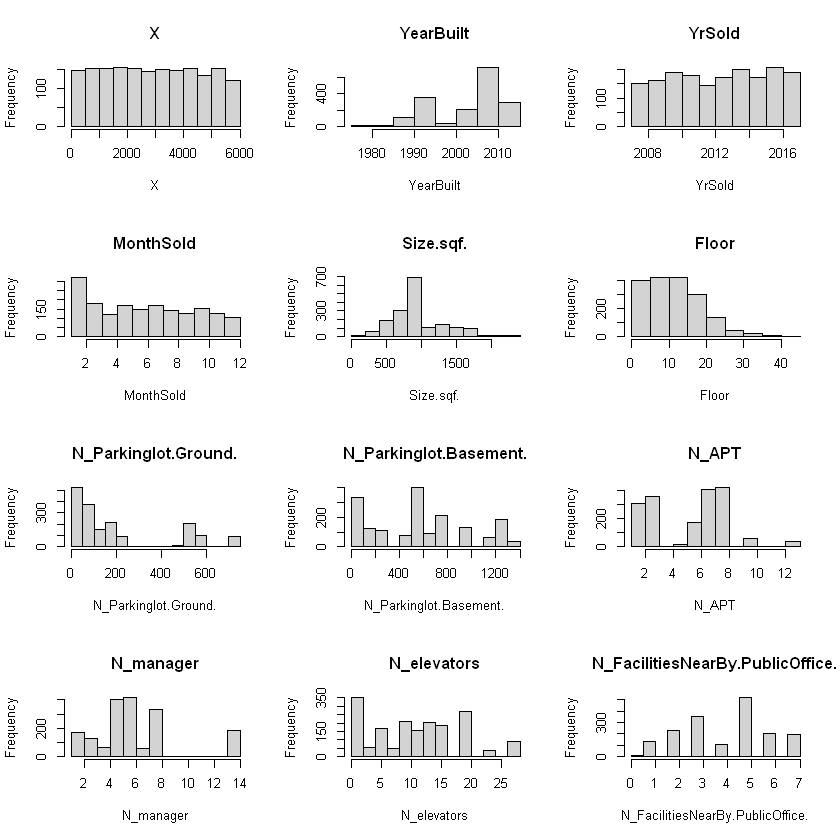

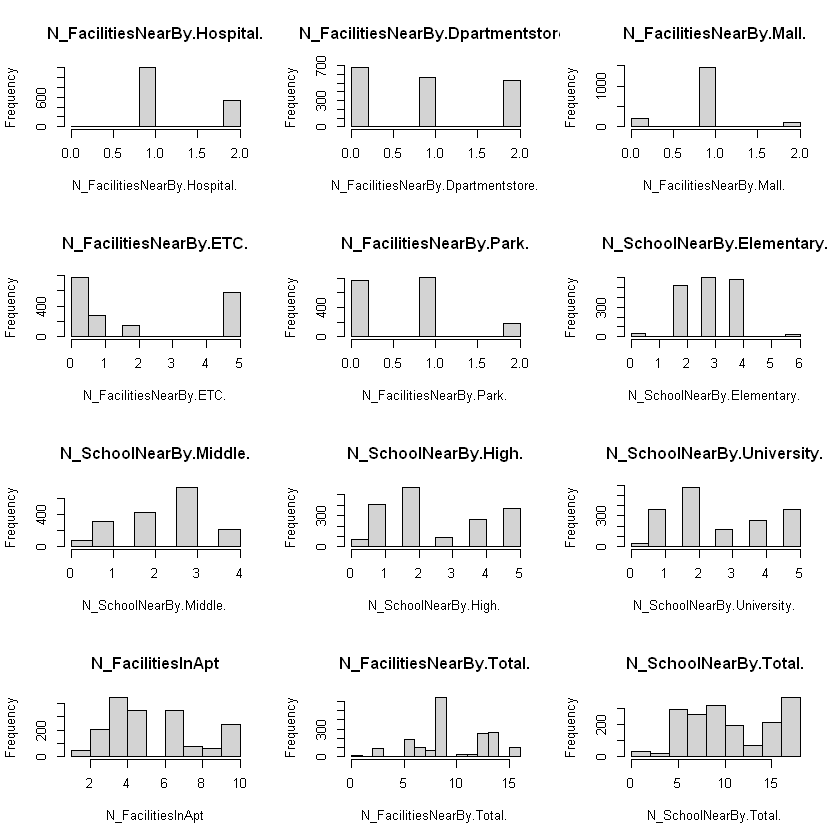

In [90]:
# Identificar columnas numéricas
var_numericas <- sapply(data, is.numeric)

# Crear histogramas para cada columna numérica
par(mfrow = c(4, 3))  # Organiza los gráficos en una matriz 4x3

for (col in names(data)[var_numericas]) {
  hist(data[[col]], main = col, xlab = col)
}

# Restaurar la configuración de gráficos a una sola gráfica
par(mfrow = c(1, 1))

#### Graficos exploratorio

En el diagrama de correlacion a continuacion podemos evidenciar variables que teinen una correlacion positiva  con la variable de precio de venta de la vivienda, como por ejemplo Year Built o N_FacilitiesInApt, tambien tienen una alta correlacion positia la variable YrSold con el precio de venta. Tambien hay variables con correlacion negativa como por ejemplo el precio de venta y N_Parkinglot.Basement.

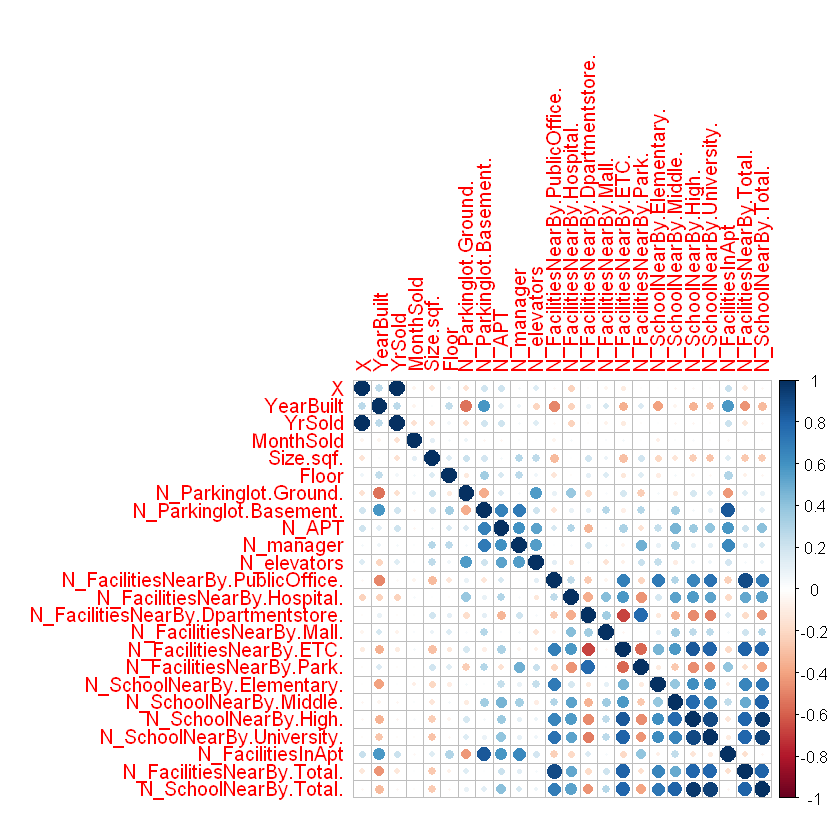

In [91]:
# Se exluyen las variables categóricas 
cor_data<-cor(data[,-c(7,8,9, 12, 13, 17)])
corrplot(cor_data)

Diagramas de dispercion en relacion a la variable de precio de venta de la casa. La variablde YrSold muestra una correlacion positiva.

In [92]:
variable_referencia <- "X"
# Encuentra todas las variables numéricas, excluyendo la variable de referencia
var_numericas <- sapply(data, is.numeric)
var_numericas <- names(data)[var_numericas]
var_numericas <- setdiff(var_numericas, variable_referencia)

# Crear los gráficos de dispersión de uno en uno
for (var in var_numericas) {
  dev.new()  # Abre una nueva ventana gráfica
  plot(data[[variable_referencia]], data[[var]], 
       main = paste(variable_referencia, "vs", var), 
       xlab = variable_referencia, 
       ylab = var)
}



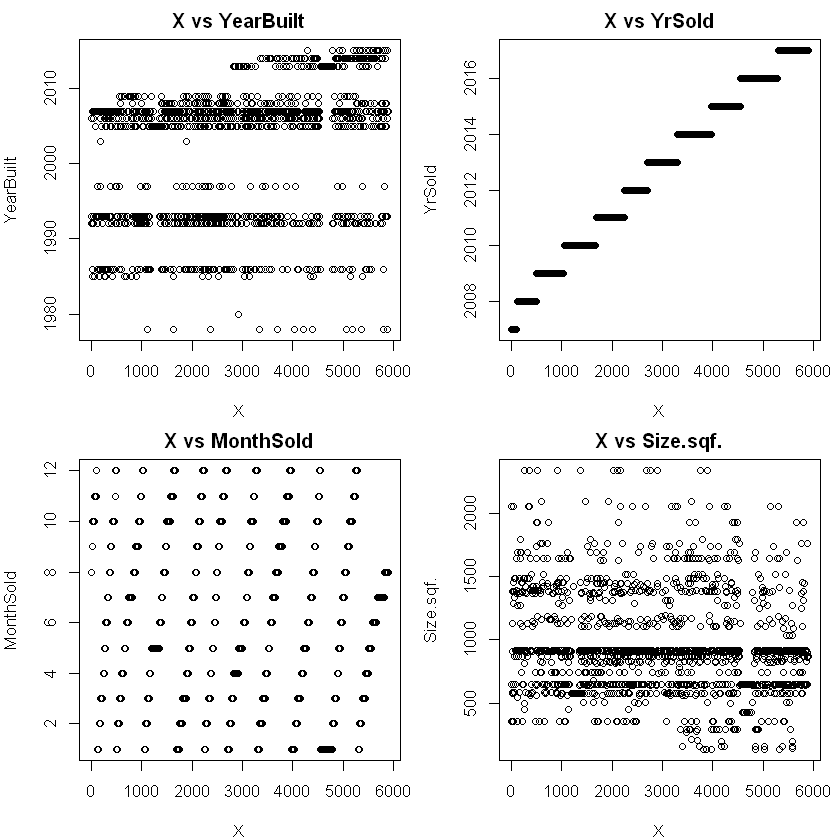

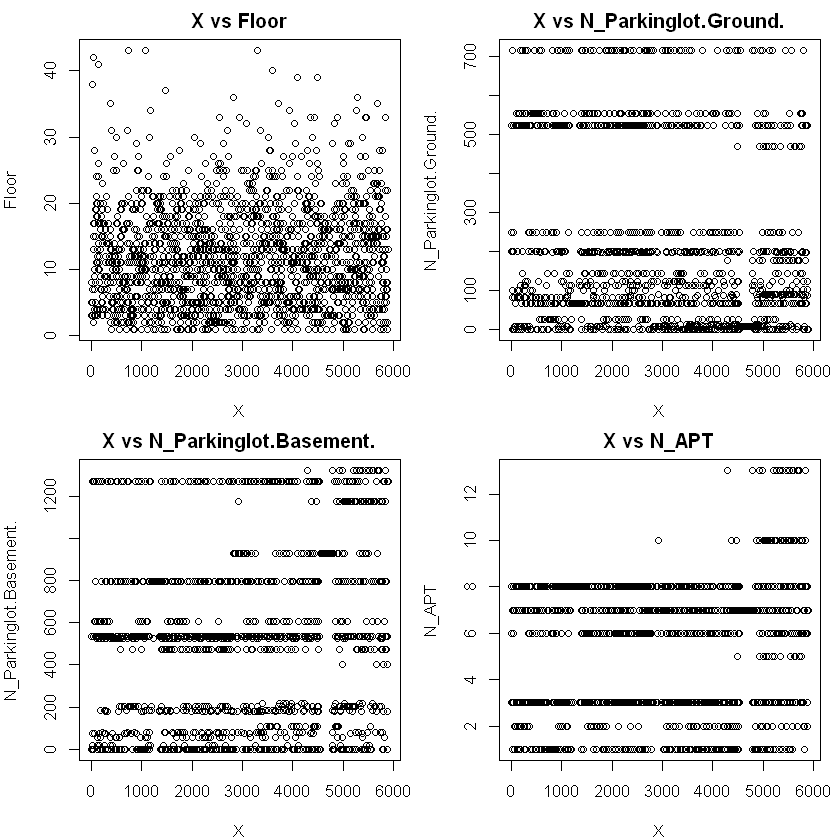

In [93]:
# Ajustar la configuración gráfica para múltiples gráficos
par(mfrow = c(2, 2), mar = c(4, 4, 2, 1))  # 2x2 layout y márgenes ajustados

# Crear los gráficos de dispersión
for (var in var_numericas) {
  plot(data[[variable_referencia]], data[[var]], 
       main = paste(variable_referencia, "vs", var), 
       xlab = variable_referencia, 
       ylab = var)
}

# Restaurar la configuración de gráficos a una sola gráfica
par(mfrow = c(1, 1))


Se observan variables que tienen valores atipicos. De las variables predictoras ,la mayoria no tienen una distribucion simetrica. Hay variables que tienen una correlacion positiva con la variable de precio de venta d ela vivienda, como lo es YrSold, ha otras variables que tienen una correlacion negativa como lo es N_Parkinglot.Basement. Tambien s epuede evidencair que para todas las variable sno hay valores austentes. 